In [828]:
import numpy as np
import matplotlib.pyplot as plt

# Домашнее задание №1

**Задача 1.** Подберите скорость обучения (alpha) и количество итераций.

**Исходные данные**

In [829]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T
print('Матрица признаков X')
X

Матрица признаков X


array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [830]:
print('Вектор ответа y')
y = np.array([[45, 55, 50, 59, 65, 35, 75, 80, 50, 60]]).T
print(y)

Вектор ответа y
[[45]
 [55]
 [50]
 [59]
 [65]
 [35]
 [75]
 [80]
 [50]
 [60]]


**Нормальное уравнение линейной регрессии и его график**

Линейная регрессия $$a(x) = w_{0}+\sum^{d}_{i=1}w_{i}x^{i},$$ где веса вычисляются по формуле:
$$w = (X^{T}X)^{-1}X^{T}y.$$

In [831]:
W_norm = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
W_norm
print(f'Нормальное уравнение линейной регрессии: y = {round(W_norm[1][0],2)}x + {round(W_norm[0][0],2)}')

Нормальное уравнение линейной регрессии: y = 3.91x + 47.23


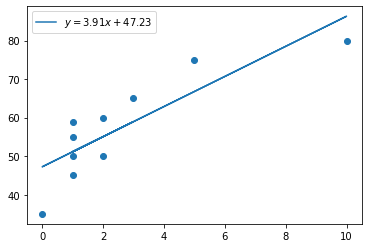

In [832]:
w_0 = W_norm[0][0]
w_1 = W_norm[1][0]
plt.scatter(X[:,1], y[:,0])
# y = w_0 + w_1 * x 
plt.plot(X[:,1], w_0 + w_1*X[:,1], label=f"$y = {round(w_1,2)}x + {round(w_0,2)}$")
plt.legend(loc="best")
plt.show()

**Функция ошибки MSE**

Функция ошибки (МSE)

в матричной форме:
$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}$$ 
в векторной форме:
$$Q(w,x) = \frac{1}{l}\sum^{l}_{i=1}(\left \langle w,x_{i} \right \rangle-y_{i})^{2}.$$

In [833]:
def calc_mse(X, W, y):
    err = (np.linalg.norm(X.dot(W) - y, ord=2)) ** 2 / y.shape[0]
    return err

print(f'Значение mse для нормального уравнения линейной регрессии: {calc_mse(X, W_norm, y)}')

Значение mse для нормального уравнения линейной регрессии: 45.937500000000014


Будем подбирать параметры модели линейной регрессии так, чтобы значение MSE было близко к полученному значению (при наименьшем количестве итераций было равно 46). 

**Обучение модели линейной регрессии (минимизация функционала ошибки градиентным спуском)**

Определим оптимальное количество итерация для фиксированного шага обучения $\alpha$.

Определяем стартовую точку

In [834]:
W = np.array([[1, 0.5]]).T
W

array([[1. ],
       [0.5]])

$k$-ый шаг градиентного спуска задается формулой

$w^{k} = w^{k-1} - \alpha \nabla Q(w^{k-1}, X)$, где $\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$

Таким образом, 
$$w^{k} = w^{k-1} - \alpha \frac{2}{l}X^{T}(Xw^{k-1}-y).$$

In [835]:
# список векторов весов после каждой итерации
w_list = [W.T[0].copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
alpha = 1e-2 
#alpha = 1e-1 # шаг слишком большой, перепрыгиваем через минимум функции
#alpha = 1e-3 # шаг слишком мал. Нужно 4300 итераций для MSE = 46
#анализ этих alpha будет дан ниже

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_W = W - alpha * (2 / y.shape[0]) * np.dot(X.T, (np.dot(X, W) - y))
    weight_dist = np.linalg.norm(new_W - W, ord=2)
    
    w_list.append(new_W.T[0].copy())
    errors.append(calc_mse(X, new_W, y))
    
    iter_num += 1
    W = new_W

w_list = np.array(w_list)

Визуализируем изменения весов

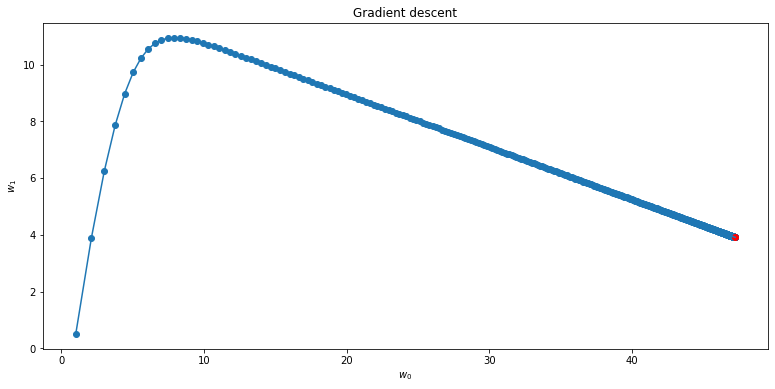

In [836]:
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(W_norm[0], W_norm[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

После каждой итерации значения искомых весов приближаются к истинным.

Визуализируем изменение функционала ошибки

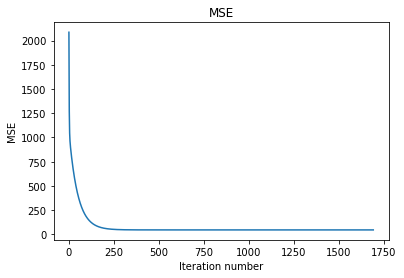

In [837]:
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.show()

Изменение монотонно и начинается с высокой точки, после определенного количества итераций выходя на асимптоту.

In [838]:
for i in range(1500):
    if i % 100 == 0:
        print(i, w_list[i], errors[i])

0 [1.  0.5] 2085.183364
100 [31.72648327  6.77395294] 172.52045652414077
200 [41.78014899  4.91746666] 61.58718002873326
300 [45.3151501   4.26470166] 47.872298267687924
400 [46.55810299  4.0351809 ] 46.176702611796244
500 [46.99514157  3.95447839] 45.96707305185028
600 [47.14881009  3.92610232] 45.94115616992714
700 [47.20284196  3.91612492] 45.937952018905754
800 [47.22184028  3.91261674] 45.93755588391548
900 [47.22852033  3.91138321] 45.93750690902961
1000 [47.23086913  3.91094949] 45.93750085417584
1100 [47.231695    3.91079699] 45.937500105603306
1200 [47.23198538  3.91074336] 45.937500013055924
1300 [47.23208749  3.91072451] 45.93750000161412
1400 [47.23212339  3.91071788] 45.93750000019955


Минимальное количество итераций, за которое MSE будет близко к MSE нормального уравнения линейной регрессии, равно 900.

In [840]:
iter_opt = 900
print(f'Оптимальное количество итераций для alpha = {alpha}: {iter_opt}')
print(f'значение MSE: {errors[iter_opt]}')
print(f'уравнение линейной регрессии: y = {w_list[iter_opt][1]}x + {w_list[iter_opt][0]}')

Оптимальное количество итераций для alpha = 0.01: 900
значение MSE: 45.93750690902961
уравнение линейной регрессии: y = 3.9113832123025083x + 47.22852033411592


Визуализируем нормальное уравнение и полученное уравнение

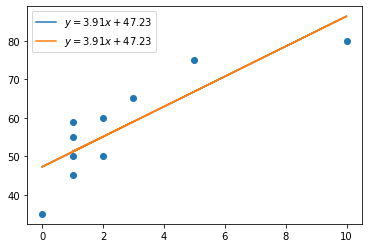

In [841]:
plt.scatter(X[:,1], y[:,0])

plt.plot(X[:,1], W_norm[0][0] + W_norm[1][0]*X[:,1], label=f"$y = {round(W_norm[1][0],2)}x + {round(W_norm[0][0],2)}$")
plt.plot(X[:,1], w_list[iter_opt][0] + w_list[iter_opt][1]*X[:,1], label=f"$y = {round(w_list[iter_opt][1],2)}x + {round(w_list[iter_opt][0],2)}$")

plt.legend(loc="best")
plt.show()

Таким образом, оптимальные значения:
$\alpha = 0.01$, количество итераций 900.

**Анализ разничных значений шага обучения $\alpha$ для градиентного спуска**

Составим функцию, которая будет возвращать список ошибок MSE при каждой итерации градиентного спуска при различных значениях шага обучеия $\alpha$.

In [842]:
def gradient(X, W, y, alpha):
    # список векторов весов после каждой итерации
    w_list = [W.T[0].copy()]

    # список значений ошибок после каждой итерации
    errors = []

    # максимальное число итераций
    max_iter = 1e4

    # критерий сходимости (разница весов, при которой алгоритм останавливается)
    min_weight_dist = 1e-8

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0

    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
        new_W = W - alpha * (2 / y.shape[0]) * np.dot(X.T, (np.dot(X, W) - y))
        weight_dist = np.linalg.norm(new_W - W, ord=2)
    
        w_list.append(new_W.T[0].copy())
        errors.append(calc_mse(X, new_W, y))
    
        iter_num += 1
        W = new_W

    w_list = np.array(w_list)
    return errors

Визуализируем изменение функционала ошибки при разных значениях $\alpha$.

**1 случай ($\alpha = 0.1$)**

<ipython-input-833-6cebb27f5e97>:2: RuntimeWarning: overflow encountered in double_scalars
  err = (np.linalg.norm(X.dot(W) - y, ord=2)) ** 2 / y.shape[0]


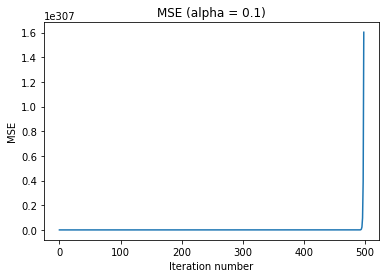

Минимальное значение MSE: 9346.122400000004


In [854]:
alpha = 1e-1

W = np.array([[1, 0.5]]).T

plt.plot(range(len(gradient(X, W, y, alpha))), gradient(X, W, y, alpha))
plt.title(f'MSE (alpha = {alpha})')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.show()

print(f'Минимальное значение MSE: {min(gradient(X, W, y, alpha))}')

Ошибка такой модели очень велика.

**2 случай ($\alpha = 0.01$)**

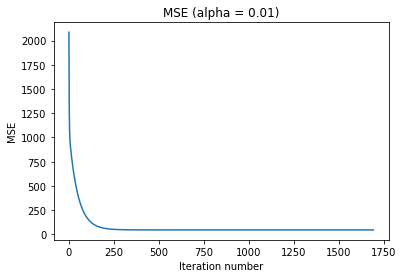

Минимальное значение MSE: 45.93750000000046


In [855]:
W = np.array([[1, 0.5]]).T
alpha = 1e-2
plt.plot(range(len(gradient(X, W, y, alpha))), gradient(X, W, y, alpha))
plt.title(f'MSE (alpha = {alpha})')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.show()

print(f'Минимальное значение MSE: {min(gradient(X, W, y, alpha))}')

In [856]:
for i in range(250,1000,50):
    print(i, gradient(X, W, y, alpha)[i])

250 51.440133352265455
300 47.872298267687924
350 46.61780052104184
400 46.176702611796244
450 46.02160678475229
500 45.96707305185028
550 45.94789827403123
600 45.94115616992714
650 45.93878555743923
700 45.937952018905754
750 45.937658935793046
800 45.93755588391548
850 45.937519649519786
900 45.93750690902961
950 45.93750242930568


При количестве 900 итерациях MSE = 45.93750690902961

**3 случай ($\alpha = 0.001$)**

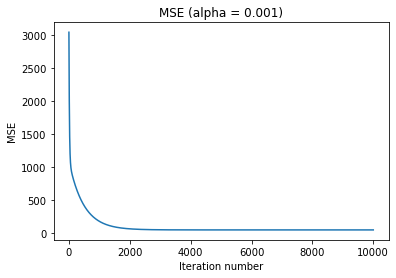

45.93750096207484

In [857]:
W = np.array([[1, 0.5]]).T
alpha = 1e-3
plt.plot(range(len(gradient(X, W, y, alpha))), gradient(X, W, y, alpha))
plt.title(f'MSE (alpha = {alpha})')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.show()

min(gradient(X, W, y, alpha))

Минимальная ошибка MSE такая же, как для нормального уравнения линейной регрессии. Но количество итераций больше, чем для шага обучения 0.01.

**Использование шага переменного размера $\alpha$**

Подберем значение шага обучение $\alpha$, чтобы оценка MSE = 45.9375 достигалась за меньшее число итераций.

In [859]:
W = np.array([[1, 0.5]]).T
alpha = 1e-2 #начальное значение шага
W, alpha

(array([[1. ],
        [0.5]]),
 0.01)

In [860]:
# список векторов весов после каждой итерации
w_list = [W.T[0].copy()]

# список значений ошибок после каждой итерации
errors = []

# список шагов градиентного спуска после каждой интегации 
alpha_list = []

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_W = W - alpha * (2 / y.shape[0]) * np.dot(X.T, (np.dot(X, W) - y))
    weight_dist = np.linalg.norm(new_W - W, ord=2)
    
    w_list.append(new_W.T[0].copy())
    errors.append(calc_mse(X, new_W, y))
    alpha_list.append(alpha)

    iter_num += 1
    W = new_W
    alpha = alpha_list[0]/(iter_num + 1)

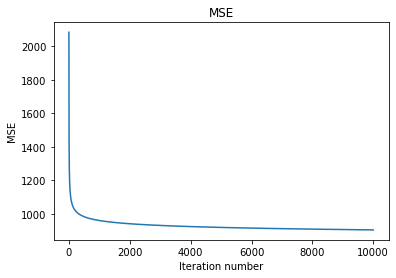

In [861]:
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.show()

Значение MSE велико, убывает монотонно, но медленнее, чем с фиксированным $\alpha$.

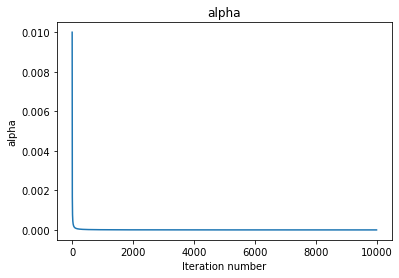

In [863]:
plt.plot(range(len(alpha_list)), alpha_list)
plt.title('alpha')
plt.xlabel('Iteration number')
plt.ylabel('alpha')

plt.show()

Изменение монотонно и начинается с высокой точки, после определенного количества итераций выходя на асимптоту.

In [864]:
for i in range(10000):
    if i % 100 == 0:
        print(i, w_list[i], errors[i], alpha_list[i])

0 [1.  0.5] 2085.183364 0.01
100 [5.04418318 9.41289662] 1060.0590773398794 9.900990099009902e-05
200 [5.42005484 9.77416917] 1021.0420128554435 4.9751243781094526e-05
300 [5.63234016 9.94848916] 1002.4924965079699 3.322259136212625e-05
400 [ 5.77991027 10.05773204] 990.8014786627252 2.493765586034913e-05
500 [ 5.89275374 10.13493438] 982.4390497068964 1.9960079840319362e-05
600 [ 5.98395882 10.19345521] 976.007627866468 1.663893510815308e-05
700 [ 6.06040412 10.23991035] 970.8230054112016 1.4265335235378031e-05
800 [ 6.12614783 10.27801558] 966.5033122618055 1.2484394506866417e-05
900 [ 6.18378258 10.3100466 ] 962.8154009977046 1.1098779134295228e-05
1000 [ 6.23506427 10.33748853] 959.6072743617558 9.99000999000999e-06
1100 [ 6.28123657 10.3613589 ] 956.7747453846736 9.082652134423252e-06
1200 [ 6.32321212 10.38238226] 954.2435139391239 8.32639467110741e-06
1300 [ 6.36168018 10.40109098] 951.9588654691013 7.686395080707149e-06
1400 [ 6.3971739  10.41788653] 949.8794244688521 7.1377587

Значение ошибки MSE велико. Показатели MSE с фиксированным $\alpha$ лучше (при 900 итерациях MSE близка к MSE нормального уравнения линйеной регрессии).

**Ответ:** 900 итераций, $\alpha = 0.01$.

**Задача 2*.** В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее.

Данные коды не запустятся, поскольку отличны от кода в задаче 1.

In [ ]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    if i % 100 == 0:
        print(i, W, err)

In [ ]:
Исправленный вариант:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= alpha * (1/n )* 2 * np.dot((y_pred - y), X.T)
    if i % 100 == 0:
        print(i, W, err) 

Результат работы:
    0 [1.01102 0.534  ] 3173.15
    100 [2.02168794 3.452835  ] 2207.6942101483005
    200 [2.88306663 5.58962851] 1670.7027004086372
    300 [3.63289519 7.14848061] 1368.0832412796258
    400 [4.29908617 8.28027926] 1193.7493344933293
    500 [4.90228732 9.09657298] 1089.714750358689
    600 [5.45777535 9.67982684] 1024.2828984889416
    700 [ 5.97685612 10.0910047 ] 980.1260644155933
    800 [ 6.46789973 10.37517467] 947.770026039189
    900 [ 6.93710574 10.56565326] 922.0330206910179